In [ ]:
#Data Visualization Assignment
#Paul Okimat

In [257]:
#Uncover the factors that lead to employee attrition and explore important questions such as:
#1. Show a breakdown of distance from home by job role and attrition.
#2. Compare average monthly income by education and attrition.

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency 

In [373]:
df=pd.read_csv('As.csv')
df.columns = df.columns.str.replace(' ', '')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [374]:
#checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [321]:
#df.isnull().sum()

In [375]:
df["DistanceFromHome"].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [376]:
# usingpandas value_counts
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [324]:
#distance_home=pd.cut(df.DistanceFromHome,bins=6).value_counts(sort=False)
#distance_home

In [377]:
category = pd.cut(df.DistanceFromHome,bins=[0,3,10,29], labels=['Near', 'Midway', 'Far'])
df.insert(5,'distancehome',category)
#to enable ease in comparison, the distance from home has been caegorised into Near (0-3), Midway(3-10), and Far(10-29)

In [326]:
#del df['distancehome']

In [378]:
df['distancehome'].value_counts()

Midway    523
Near      503
Far       444
Name: distancehome, dtype: int64

In [379]:
#1. Show a breakdown of distance from home by job role and attrition.
#crosstab
pd.crosstab(df.JobRole, df.distancehome, margins=True, margins_name="Total")

distancehome,Near,Midway,Far,Total
JobRole,,,,
Healthcare Representative,42,41,48,131
Human Resources,22,16,14,52
Laboratory Technician,82,97,80,259
Manager,44,34,24,102
Manufacturing Director,53,45,47,145
Research Director,30,28,22,80
Research Scientist,103,106,83,292
Sales Executive,100,121,105,326
Sales Representative,27,35,21,83


In [380]:
pd.crosstab(df.JobRole, df.distancehome, normalize='index')

distancehome,Near,Midway,Far
JobRole,,,
Healthcare Representative,0.320611,0.312977,0.366412
Human Resources,0.423077,0.307692,0.269231
Laboratory Technician,0.316602,0.374517,0.308880
Manager,0.431373,0.333333,0.235294
Manufacturing Director,0.365517,0.310345,0.324138
Research Director,0.375000,0.350000,0.275000
Research Scientist,0.352740,0.363014,0.284247
Sales Executive,0.306748,0.371166,0.322086
Sales Representative,0.325301,0.421687,0.253012


In [330]:
#from the tables above majority (>60%) of the employees are staying eiter near to, or midway  from the work place.

In [381]:
#A contigency table of  distance of the work place from home and attrition from work. 
pd.crosstab(df.distancehome, df.Attrition, margins=True, margins_name="Total")

Attrition,No,Yes,Total
distancehome,,,
Near,435,68,503
Midway,447,76,523
Far,351,93,444
Total,1233,237,1470


In [382]:
#A contigency table of proporions distance of the work place from home and attrition from work. 
ar=pd.crosstab(df.distancehome, df.Attrition, normalize='index')
ar.style.set_caption('A contigency table of proporions distance of the work place from home and attrition from work')

Attrition,No,Yes
distancehome,,
Near,0.864811,0.135189
Midway,0.854685,0.145315
Far,0.790541,0.209459


In [333]:
#From the findings above the highest proportion (per distance category) of employees who left were 20.9% and 
#were "far" away from the workplace.

In [383]:
#2. Compare average monthly income by education and attrition.
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [384]:
#df.groupby(['MonthlyIncome']).count()
df["MonthlyIncome"].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [385]:
Inccategory = pd.cut(df.MonthlyIncome, bins=[1000,5000,10000,15000,20000], labels=['Low', 'MidLow','MidHigh', 'High'])
df.insert(18,'Incomecat',Inccategory)
df
# To enable ease in comparison,income earned has been categorised into low, MidLow, MidHigh, and High

,Age,Attrition,BusinessTravel,DailyRate,Department,distancehome,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,Near,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,Midway,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,Near,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,Near,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,Near,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,Far,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,Midway,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,Midway,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,Near,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [363]:
df.groupby(['Incomecat']).count()

,Age,Attrition,BusinessTravel,DailyRate,Department,distancehome,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Incomecat,,,,,,,,,,,,,,,,,,,,,
Low,749,749,749,749,749,749,749,749,749,749,...,749,749,749,749,749,749,749,749,749,749
MidLow,440,440,440,440,440,440,440,440,440,440,...,440,440,440,440,440,440,440,440,440,440
MidHigh,148,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
High,133,133,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,133,133,133


In [364]:
#To enable proper comparison, income earned has been categorised into low, Midlow, MidHigh
Inc_Atr=pd.crosstab(df.Incomecat, df.Attrition, margins=True, margins_name="Totals")
Inc_Atr.style.set_caption('A contigency table of income earned and attrition from work')

Attrition,No,Yes,Totals
Incomecat,,,
Low,586,163,749
MidLow,391,49,440
MidHigh,128,20,148
High,128,5,133
Totals,1233,237,1470


In [365]:
ax=pd.crosstab(df.Incomecat, df.Attrition, normalize='index')
ax.style.set_caption('A contigency table of proportions of salary of employees and attrition from work')
#A contigency table of proportions of salary of employees and attrition from work

Attrition,No,Yes
Incomecat,,
Low,0.782377,0.217623
MidLow,0.888636,0.111364
MidHigh,0.864865,0.135135
High,0.962406,0.037594


In [366]:
#comparision 
chival, pval, df, exp=chi2_contingency(Inc_Atr)
chival, pval, df, exp

(41.48390920551079,
 1.6922305170082384e-06,
 8,
 array([[ 628.24285714,  120.75714286,  749.        ],
        [ 369.06122449,   70.93877551,  440.        ],
        [ 124.13877551,   23.86122449,  148.        ],
        [ 111.55714286,   21.44285714,  133.        ],
        [1233.        ,  237.        , 1470.        ]]))

In [367]:
exp.min()

21.442857142857143

In [368]:
len(exp[exp<5])/len(exp)*100

0.0

In [343]:
#There is statistical evidence of an association between monthly income earned and attrition.
#Attrition apeears to decrease with an increase in salary earned. That is the more one earns, the less likely they are to leave 
#the Job

In [386]:
#A contigency table of salary category of employees and education level attained
Inc_Ed=pd.crosstab(df.Incomecat, df.Education, margins=True, margins_name="Total")
Inc_Ed.style.set_caption('A contigency table of salary category of employees and education level attained')


Education,1,2,3,4,5,Total
Incomecat,,,,,,
Low,108,150,300,177,14,749
MidLow,35,88,158,139,20,440
MidHigh,17,19,63,44,5,148
High,10,25,51,38,9,133
Total,170,282,572,398,48,1470


In [387]:
pd.crosstab(df.Incomecat, df.Education, normalize='index')
# A contigency table of proportions of salary category and education level attained

Education,1,2,3,4,5
Incomecat,,,,,
Low,0.144192,0.200267,0.400534,0.236315,0.018692
MidLow,0.079545,0.200000,0.359091,0.315909,0.045455
MidHigh,0.114865,0.128378,0.425676,0.297297,0.033784
High,0.075188,0.187970,0.383459,0.285714,0.067669


In [389]:
chival_, pval_, df_, exp_=chi2_contingency(Inc_Ed)
chival_, pval_, df_, exp_

(36.225724457879295,
 0.014467581481808312,
 20,
 array([[  86.61904762,  143.68571429,  291.44761905,  202.79047619,
           24.45714286,  749.        ],
        [  50.88435374,   84.40816327,  171.21088435,  119.1292517 ,
           14.36734694,  440.        ],
        [  17.11564626,   28.39183673,   57.58911565,   40.0707483 ,
            4.83265306,  148.        ],
        [  15.38095238,   25.51428571,   51.75238095,   36.00952381,
            4.34285714,  133.        ],
        [ 170.        ,  282.        ,  572.        ,  398.        ,
           48.        , 1470.        ]]))

In [390]:
exp_.min()

4.3428571428571425

In [391]:
len(exp_[exp_<5])/len(exp_)*100

40.0

In [ ]:
#There is statistical evidence of presence of an association between monthly Income and Education
#Higher education appears to be associated with higher pay. 

[Text(0.5, 1.0, 'Graph showing a breakdown of distance from home by job role and attrition')]

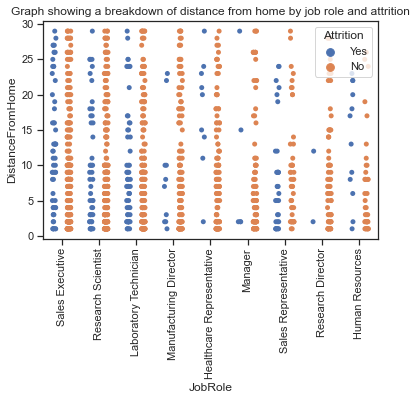

In [396]:
#Data visualisation 
#Show a breakdown of distance from home by job role and attrition
vis=sns.stripplot(x='JobRole', y='DistanceFromHome', data=df,
              jitter=True, hue='Attrition', dodge=True)
vis.set_xticklabels(vis.get_xticklabels(), rotation=90)
vis.set(title='Graph showing a breakdown of distance from home by job role and attrition')

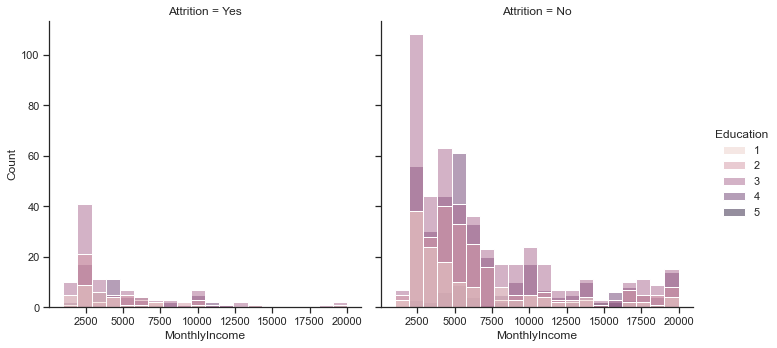

In [393]:
vs=sns.displot(df, x="MonthlyIncome", hue="Education", col="Attrition")
#vs.set(title='Graph comparing average monthly income by monthly income and education')
#Graph comparing average monthly income by monthly income and education

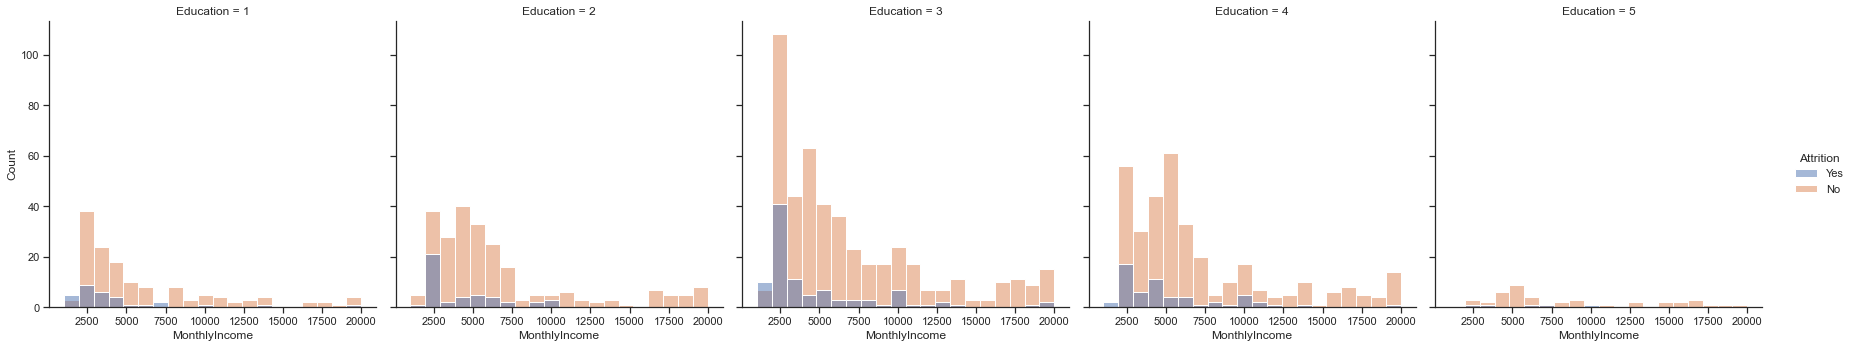

In [394]:
vis1=sns.displot(df, x="MonthlyIncome", hue="Attrition", col="Education")
#vis1.set(title='Graph comparing average monthly income by education and attrition')
#Graph comparing average monthly income by education and attrition

[Text(0.5, 1.0, 'Graph comparing average monthly income by education and attrition')]

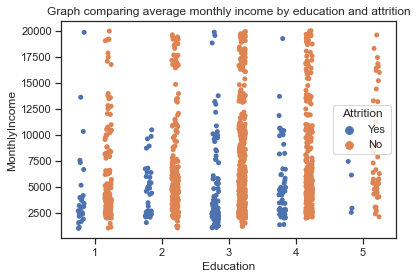

In [395]:
vis2=sns.stripplot(x='Education', y='MonthlyIncome', data=df,
              jitter=True, hue='Attrition', dodge=True)
vis2.set(title='Graph comparing average monthly income by education and attrition')
